# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


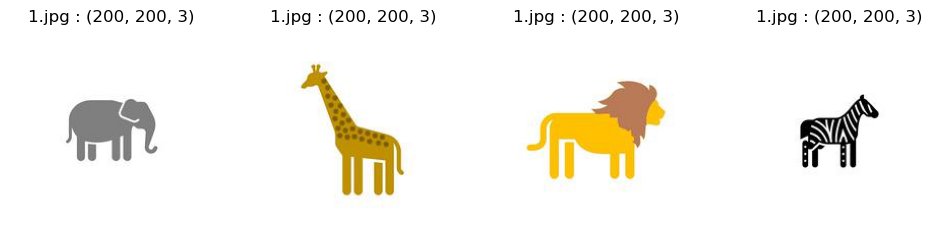

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
# You need to change the data_path to match the location of your images
data_path = "safari/training"
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [2]:
#Your libraries here
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models


### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [3]:
#setting image size
img__size = (224, 224)
bathch_size = 32

# Create a data generator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

# Loading the training dataset
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=img__size,
    batch_size=bathch_size,
    class_mode='categorical',
    subset='training'
)

# Loading the validation dataset
validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=img__size,
    batch_size=bathch_size,
    class_mode='categorical',
    subset='validation'
)

classnames = train_generator.class_indices.keys()

Found 320 images belonging to 4 classes.
Found 76 images belonging to 4 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (6, 6), activation='relu', input_shape=train_generator.image_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 6, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 6, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 219, 219, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 104, 32)      36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

### Train the model
Train a CNN model with 10 epochs.

In [5]:
# Train the model
num_epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // bathch_size,
    validation_data = validation_generator,
    validation_steps=validation_generator.samples // bathch_size,
    epochs=num_epochs
)

Epoch 1/10
10/10 [==============================] - 47s 4s/step - loss: 1.0247 - accuracy: 0.5188 - val_loss: 0.2338 - val_accuracy: 0.9688
Epoch 2/10
10/10 [==============================] - 35s 3s/step - loss: 0.0971 - accuracy: 0.9875 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 34s 3s/step - loss: 0.0635 - accuracy: 0.9688 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 35s 3s/step - loss: 0.0512 - accuracy: 0.9906 - val_loss: 9.0860e-04 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 33s 3s/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 33s 3s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9844
Epoch 7/10
10/10 [==============================] - 33s 3s/step - loss: 7.2863e-04 - accuracy: 1.0000 - val_loss: 3.0707e-05 - val_accuracy: 1.0000
Epoch 8/

### View loss history
- To check for overfitting.

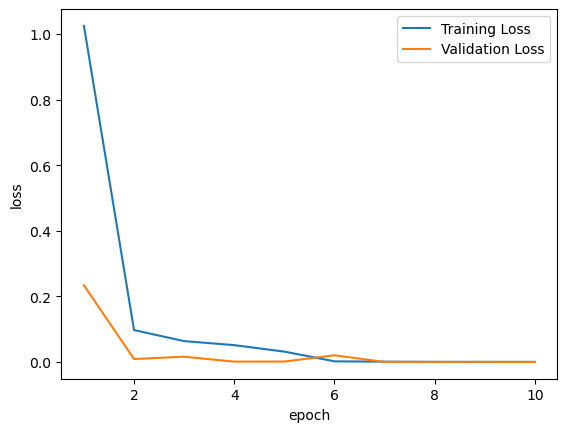

In [6]:
epoch_nums = range(1, num_epochs + 1)

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

### Evaluate the model

1/1 [==============================] - 1s 770ms/step


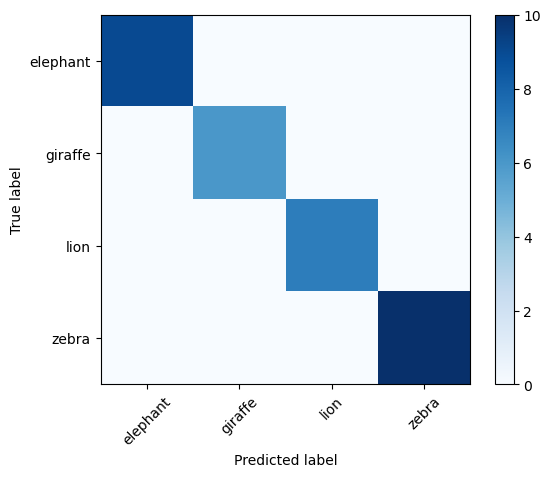

In [7]:
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# class prediction
class_prbability = model.predict(x_test)

predictions = np.argmax(class_prbability, axis=1)

true_label = np.argmax(y_test, axis=1)

confu_matrix = confusion_matrix(true_label, predictions)
plt.imshow(confu_matrix, interpolation='nearest',cmap= plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=45)
plt.yticks(tick_marks, classnames)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Save your model

Add code below to save your model's trained weights.

In [8]:
#save trained model
modelname = 'safari_animal_Classifier.h5'
model.save(modelname)
del model
print('Model Saved As:', modelname)

Model Saved As: safari_animal_Classifier.h5


### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 [==============================] - 0s 46ms/step


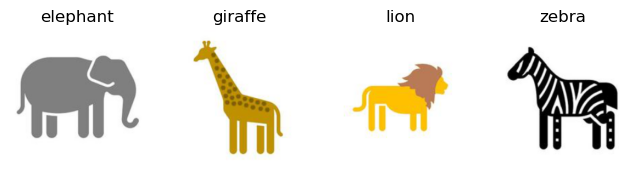

In [9]:
# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index


# Load your model
model = models.load_model(modelname) # loads the saved model

# The images are in the data/shapes folder
test_data_path = 'safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    #image resize
    img = cv2.resize(img,(224,224))
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()